# **TAREA 2 CADENAS DE MARKOV Y APLICACIONES**


---

Integrantes:
1. Oscar Julián Rodríguez Cárdenas
2. Tania Julieth Araque Dueñas
3. Angela Sofía Rubiano Quintero


# 1. Con base en el siguiente resultado visto en clase: 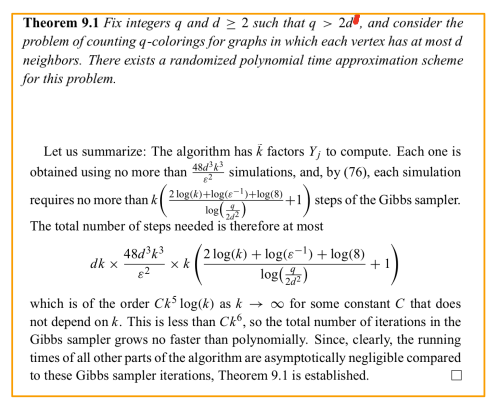

Realice experimentos que permitan dar valores aproximados del número de q-coloraciones de un lattice $k$ x $k$.

Considere $3 \leq k \leq 20$ y $2 \leq q \leq 15$

Antes de pasar a la implementación del código daremos una breve explicacón del teorema y como lo pensamos usar.Para entender el teorema es bastante útil desglosarlo en sus partes más importantes:

1. #### Condición sobre $q$ y $d$:
La condición $q \geq 2d^2$ es crucial porque establece una relación entre el número de colores disponibles ($q$) y el grado máximo de los vértices en el grafo ($d$). Esta condición asegura que hay suficientes colores para que sea probable encontrar muchas $q$-coloraciones válidas. Intuitivamente, si $q$ es muy pequeño en comparación con $d$, podría ser difícil encontrar una coloración válida debido a la alta probabilidad de que dos vértices adyacentes compartan el mismo color.

2. #### Esquema de Aproximación Aleatorizado:
El teorema no solo asegura que es posible contar $q$-coloraciones, sino que también garantiza la existencia de un esquema de aproximación en tiempo polinomial aleatorizado. Esto significa que, en lugar de contar exactamente todas las $q$-coloraciones (lo cual podría ser computacionalmente inviable), se puede aproximar este conteo con una alta precisión utilizando un algoritmo que ejecuta en tiempo polinomial con respecto al tamaño del grafo.


3. #### Algoritmo Basado en el Muestreo de Gibbs:
La prueba del teorema y su implementación en la práctica suelen depender de un algoritmo basado en el muestreo de Gibbs. El muestreo de Gibbs es una técnica de Monte Carlo que permite generar muestras de una distribución de probabilidad compleja, en este caso, las posibles $q$-coloraciones de un grafo.La idea es realizar múltiples simulaciones en las que se actualizan los colores de los vértices de manera iterativa, en función de los colores de sus vecinos. A medida que el número de simulaciones aumenta, las muestras obtenidas se acercan a la verdadera distribución de $q$-coloraciones válidas.


4. #### Número de Pasos y Simulaciones:
Para aplicar el muestreo de Gibbs, es necesario realizar un cierto número de pasos que dependen de los parámetros $K$ (relacionado con el tamaño del grafo), $d$, $q$, y $\epsilon$ (un parámetro de precisión).


# Implementación en Python
Se implementó un algoritmo basado en el muestreo de Gibbs para aproximar el número de $q$-coloraciones válidas en un lattice $K \times K$. A continuación, se describen los pasos clave del algoritmo:

1. #### Inicialización del Lattice:
Se genera un lattice $K \times K$, donde cada celda tiene un color inicial aleatorio entre 1 y $q+1$.

2.  #### Muestreo de Gibbs:
El algoritmo realiza simulaciones donde se selecciona aleatoriamente una celda en el lattice, y se actualiza su color considerando las probabilidades condicionadas por los colores de sus vecinos.

3. #### Verificación de Coloreo Válido:
Después de cada simulación, se verifica si el lattice obtenido es un $q$-coloreo válido, es decir, si todos los nodos vecinos tienen colores diferentes.

4. #### Estimación del Número de $q$-Coloraciones:
El algoritmo repite el proceso de muestreo varias veces y estima el número de $q$-coloraciones válidas como la proporción de simulaciones exitosas sobre el total de simulaciones.

In [7]:
import networkx as nx
import numpy as np
import random
import math

In [ ]:

def initialize_lattice(K, q):
    """Inicializa el lattice KxK con colores aleatorios de 1 a q."""
    return np.random.randint(1, q + 1, size=(K, K))


In [ ]:
def systematic_gibbs_sampler(lattice, K, q, steps):
    """Aplica el Systematic Gibbs Sampler para generar una q-coloración del lattice."""
    for _ in range(steps):
        # En lugar de seleccionar aleatoriamente, iteramos sistemáticamente sobre todas las celdas
        for i in range(K):
            for j in range(K):
                # Calcular los vecinos de la celda (i, j)
                neighbors = [
                    lattice[(i-1) % K, j],  # Vecino superior
                    lattice[(i+1) % K, j],  # Vecino inferior
                    lattice[i, (j-1) % K],  # Vecino izquierdo
                    lattice[i, (j+1) % K]   # Vecino derecho
                ]
                # Generar lista de colores disponibles que no estén entre los vecinos
                available_colors = [color for color in range(1, q + 1) if color not in neighbors]
                if available_colors:
                    lattice[i, j] = random.choice(available_colors)

In [ ]:
def is_valid_coloring(lattice, K):
    """Verifica si la configuración actual del lattice es una q-coloración válida."""
    for i in range(K):
        for j in range(K):
            neighbors = [
                lattice[(i-1) % K, j],
                lattice[(i+1) % K, j],
                lattice[i, (j-1) % K],
                lattice[i, (j+1) % K]
            ]
            if lattice[i, j] in neighbors:
                return False
    return True


In [ ]:
def estimate_q_colorations(K, q, epsilon, d):
    """Estima el número de q-coloraciones válidas para un lattice KxK usando Systematic Gibbs Sampler."""
    steps = int(K * (((2 * np.log10(K) + np.log10(1/epsilon) + np.log10(8)) / np.log10(q/(2*d))) + 1))
    steps = int(K * (((2 * np.log10(K) + np.log10(1/epsilon) + np.log10(8)) / np.log10(q/(2*d))) + 1))

    num_simulations = int((48 * (d**3) * (K**3)) / (epsilon**2))
    unique_colorations = set()

    for _ in range(num_simulations):
        lattice = initialize_lattice(K, q)
        systematic_gibbs_sampler(lattice, K, q, steps)
        if is_valid_coloring(lattice, K):
            # Convertir el lattice a una tupla para poder almacenarlo en un set
            lattice_tuple = tuple(map(tuple, lattice))
            unique_colorations.add(lattice_tuple)

    return len(unique_colorations)

Vamos a comenzar con K=3, d= 2, q=5 y epsilon=0.5

In [ ]:
K = 3
q = 5
epsilon = 0.5
d = 2

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")


K = 3, q = 5, epsilon = 0.5 Estimación de q-coloraciones válidas: 21520


Si reducimos el valor de epsilon para obtener mayor precision.
Vamos con K=3, d= 2, q=5 y epsilon=0.2

In [ ]:
K = 3
q = 5
epsilon = 0.2
d = 2

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 5, epsilon = 0.2 Estimación de q-coloraciones válidas: 27478


Ahora si ponemos d=$4$ (que es el numero maximo de vecinos que puede tener una arista) y nuevamente reducimos epsilon a 0.1:

In [ ]:
K = 3
q = 5
epsilon = 0.1
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 5, epsilon = 0.1 Estimación de q-coloraciones válidas: 45887


In [ ]:
K = 3
q = 5
epsilon = 0.08
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 5, epsilon = 0.08 Estimación de q-coloraciones válidas: 73456


Ahora miremos el caso para latices de tamaño $3$ x $3$ pero con 6 colores:

In [ ]:
K = 3
q = 6
epsilon = 0.5
d = 2

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 6, epsilon = 0.5 Estimación de q-coloraciones válidas: 38898


In [ ]:
K = 3
q = 6
epsilon = 0.1
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 6, epsilon = 0.1 Estimación de q-coloraciones válidas: 177871


In [ ]:
K = 3
q = 6
epsilon = 0.05
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 6, epsilon = 0.05 Estimación de q-coloraciones válidas: 305928


In [ ]:
K = 3
q = 6
epsilon = 0.01
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 6, epsilon = 0.01 Estimación de q-coloraciones válidas: 613462


Ahoara probemos con 7 colores:

In [ ]:
K = 3
q = 7
epsilon = 0.5
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 7, epsilon = 0.5 Estimación de q-coloraciones válidas: 18065


In [ ]:
K = 3
q = 7
epsilon = 0.1
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 7, epsilon = 0.1 Estimación de q-coloraciones válidas: 411508


In [ ]:
K = 3
q = 7
epsilon = 0.05
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 7, epsilon = 0.05 Estimación de q-coloraciones válidas: 1240075


In [ ]:
K = 3
q = 7
epsilon = 0.03
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 3, q = 7, epsilon = 0.03 Estimación de q-coloraciones válidas: 1987268


In [ ]:
K = 5
q = 7
epsilon = 0.3
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 5, q = 7, epsilon = 0.3 Estimación de q-coloraciones válidas: 2094


In [ ]:
K = 5
q = 7
epsilon = 0.1
d = 4

result = estimate_q_colorations(K, q, epsilon, d)
print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de q-coloraciones válidas: {result}")

K = 5, q = 7, epsilon = 0.1 Estimación de q-coloraciones válidas: 19390


Vamos ahora a comparar los resultados obtenidos con un paquete de conteo exacto, utilizaremos SageMath,es una poderosa herramienta matemática que incluye soporte para combinatoria y teoría de grafos. SageMath ofrece métodos para calcular el polinomio cromático, que nos va permitir contar el número exacto de coloraciones de un grafo dado un número de colores.Utilizaremos codigo en python pero ejecutandolo en su plataforma en linea la cual la podemos encontrar en https://sagecell.sagemath.org/



El codigo utilizado es el siguiente:

In [ ]:
# Crear el grafo del lattice kxk
k = 3
q = 5
G = graphs.Grid2dGraph(k,k)

# Calcular el polinomio cromático del grafo
chromatic_polynomial = G.chromatic_polynomial()

# Evaluar el polinomio cromático para q  colores
num_colorations = chromatic_polynomial(q)

# Imprimir el resultado
print(f"Número exacto de {q}-coloraciones en el lattice {k}x{k}: {num_colorations}")

Ahora bien para k=$3$ y q=$5$

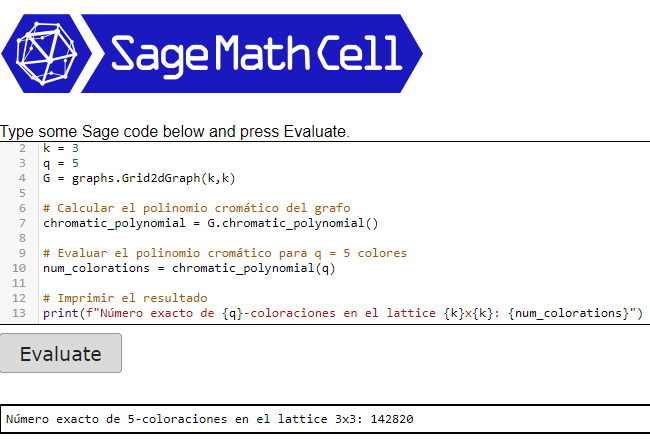

Para k = $3$ y q = $6$

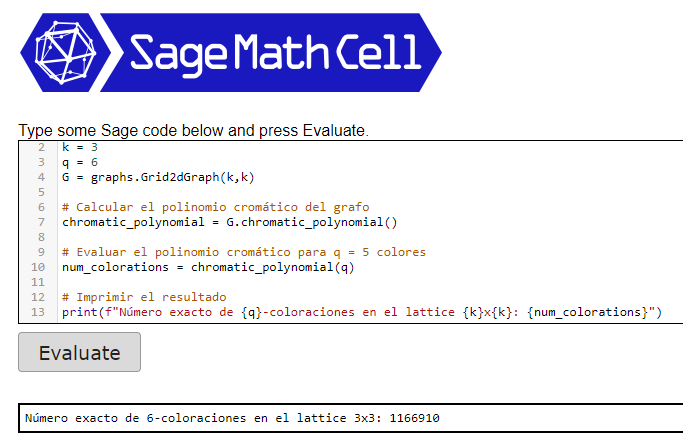

Para k = $3$ y q = $7$

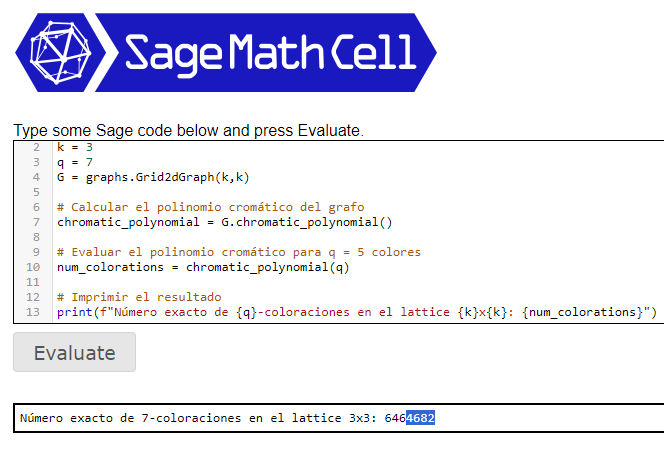

Para k = $5$ y q = $7$

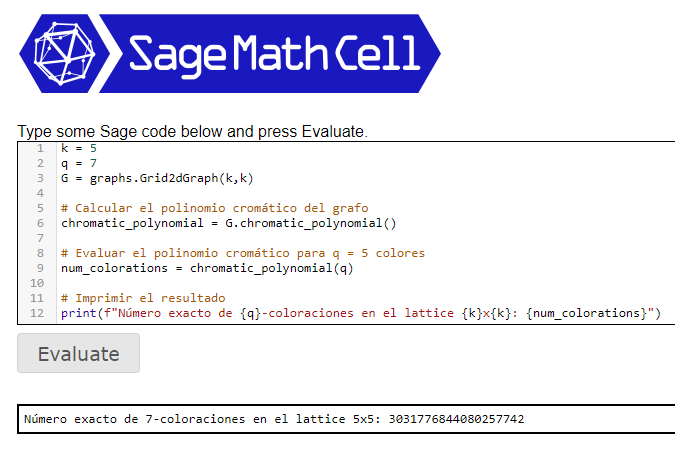

Para k = $5$ y q = $9$

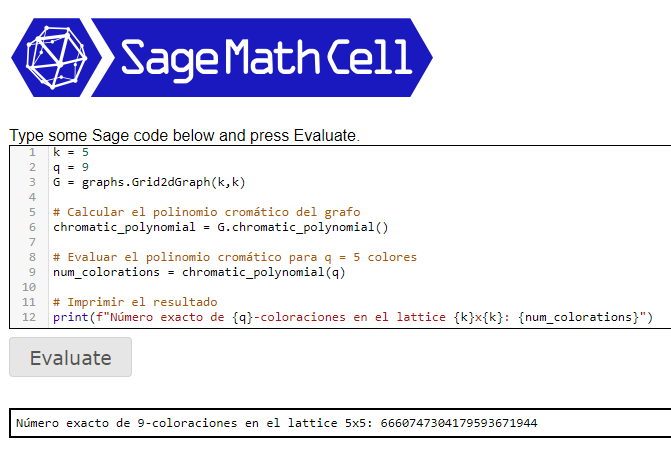

A continuación pondremos los resultados encontrados:

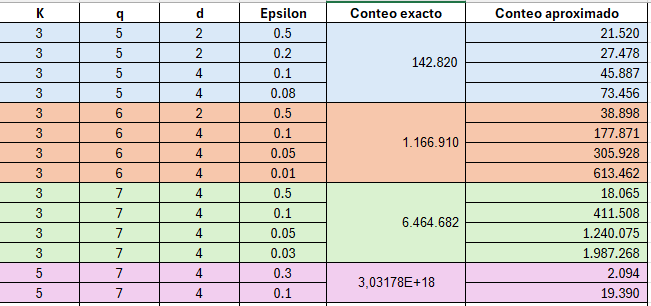


El algoritmo del Teorema 9.1 implementado en Python mediante el Gibbs Sampler es una herramienta eficiente para aproximar el número de coloraciones válidas en lattices grandes. Sin embargo, debido a la falta de poder computacional, fue más difícil realizar experimentos con un ϵ más preciso, particularmente cuando escalábamos los valores de K y q. A medida que estos parámetros crecían, el número de configuraciones válidas aumentaba considerablemente, lo que demandaba más iteraciones y simulaciones para mantener la precisión, impactando fuertemente en el tiempo de ejecución. Esta limitación nos impidió llevar a cabo un mayor número de experimentos con valores más grandes de K, 𝑞, y un
ϵ más pequeño, lo que hubiera proporcionado una mejor aproximación. Aunque el Gibbs Sampler es útil para problemas grandes y permite ajustar la precisión, su escalabilidad está limitada por los recursos computacionales disponibles.

Por otro lado, SageMath, que utiliza el polinomio cromático para calcular el número exacto de coloraciones, se encontró con limitaciones similares. El método de cálculo exacto, aunque sumamente preciso, es computacionalmente más intensivo, lo que lo hace inviable para problemas grandes, como aquellos con valores altos de K y q. Para estos valores, el número de configuraciones válidas crece de manera significativa, lo que hace que el cálculo sea extremadamente costoso en términos de tiempo y memoria. Debido a estas limitaciones computacionales, fue imposible realizar más experimentos tanto con el algoritmo implementado como con SageMath. En resumen, mientras que el Gibbs Sampler proporciona una aproximación eficiente en problemas de gran escala, y SageMath ofrece precisión para casos más pequeños, ambos enfoques se ven restringidos cuando se enfrentan a grandes problemas y recursos computacionales limitados.



---


2. Obtenga valores aproximados para el número de configuraciones fáctibles en el modelo "Hard core" para lattices k x k con $3 \leq k \leq 20$..

Para realizar estos experimentos , podemos ver que es el mismo problema solo que esta vez debemos contar 2-coloraciones, por lo tanto $q$ estará fijo en $2$, pues la celda puede estar "ocupada" o "vacía".

In [2]:
def gibbs_sampler_steps(dimension, d, epsilon, q):
    """Calcula el número de pasos requeridos por el Gibbs sampler con +1 dentro del cociente."""
    log_term_1 = np.log10(dimension) if dimension > 1 else 1
    log_term_2 = np.log10(1/epsilon) if epsilon < 1 else 1
    log_term_3 = np.log10(8)
    log_term_4 = np.log10(q/(2*d)) if (q/(2*d)) > 1 else 1

    return int(dimension * (((2 * log_term_1 + log_term_2 + log_term_3) / log_term_4) + 1))

In [3]:
def number_of_simulations(d, K, epsilon):
    """Calcula el número de simulaciones necesarias."""
    return int((48 * (d**3) * (K**3)) / (epsilon**2))

In [4]:
def hard_core_simulation(K, steps):
    """Realiza una simulación para obtener configuraciones factibles en el modelo Hard Core."""
    lattice = np.zeros((K, K))
    valid_configurations = set()

    for step in range(steps):

        i = random.randint(0, K-1)
        j = random.randint(0, K-1)


        neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
        can_occupy = True

        for ni, nj in neighbors:
            if 0 <= ni < K and 0 <= nj < K and lattice[ni, nj] == 1:
                can_occupy = False
                break

        if can_occupy:
            lattice[i, j] = 1


        valid_configurations.add(tuple(map(tuple, lattice)))
    return valid_configurations

In [5]:
def gibbs_sampler_hardcore(K, d, epsilon, q):
    """Ejecuta el Gibbs sampler para una rejilla KxK y obtiene configuraciones factibles."""
    steps = gibbs_sampler_steps(K, d, epsilon, q)
    simulations = number_of_simulations(d, K, epsilon)

    total_valid_configurations = set()

    for _ in range(simulations):
        configurations = hard_core_simulation(K, steps)
        total_valid_configurations.update(configurations)


    return len(total_valid_configurations)

In [15]:
K = 3
q = 2
epsilon = 0.5
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 3, q = 2, epsilon = 0.5 Estimación de configuraciones factibles del modelo hardcore: 62


In [17]:
K = 3
q = 2
epsilon = 0.3
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 3, q = 2, epsilon = 0.3 Estimación de configuraciones factibles del modelo hardcore: 62


In [18]:
K = 3
q = 2
epsilon = 0.1
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 3, q = 2, epsilon = 0.1 Estimación de configuraciones factibles del modelo hardcore: 62


In [19]:
K = 4
q = 2
epsilon = 0.5
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 4, q = 2, epsilon = 0.5 Estimación de configuraciones factibles del modelo hardcore: 1233


In [20]:
K = 4
q = 2
epsilon = 0.3
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 4, q = 2, epsilon = 0.3 Estimación de configuraciones factibles del modelo hardcore: 1233


In [24]:
K = 5
q = 2
epsilon = 0.5
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 5, q = 2, epsilon = 0.5 Estimación de configuraciones factibles del modelo hardcore: 55446


In [25]:
K = 5
q = 2
epsilon = 0.3
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

K = 5, q = 2, epsilon = 0.3 Estimación de configuraciones factibles del modelo hardcore: 55446


In [ ]:
K = 10
q = 2
epsilon = 0.5
d = 4


num_configuraciones_factibles = gibbs_sampler_hardcore(K, d, epsilon, q)


print(f"K = {K}, q = {q}, epsilon = {epsilon} Estimación de configuraciones factibles del modelo hardcore: {num_configuraciones_factibles}")

A continuación pondremos los resultados encontrados.

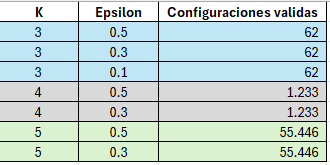